In [1]:
import json
import pandas as pd

In [2]:
filename1 = './CEA-2d29f9/CEA-2d29f9_nfts'
df = pd.read_csv(filename1+'.csv')
filename2 = './GSPACEAPE-08bc2b/GSPACEAPE-08bc2b_nfts'
df = pd.concat([pd.read_csv(filename2+'.csv'), df])

In [3]:
talents = ['Overachiever', 'Hodler', 'Grounded', 'Stonewall', 'Adrenaline Rush',
       'Overshield', 'Black Widow', 'Galvanized', 'Nano Meds', 'Resilience',
       'Cold Blooded', 'Perseverance', 'Escape Artist', 'Scavenger',
       'Cool Moves', 'Brawler', 'Automatic Weapons Proficiency',
       'Scatter Weapons Proficiency', 'Precision Weapons Proficiency',
       'Explosive Weapons Proficiency', 'Elemental Weapons Proficiency']

In [4]:
# heatmap of talents frequency
df_talents = df[talents]
df_talents = df_talents.fillna(0)
df_talents = df_talents.astype(int)
df_talents = df_talents.sum(axis=0)
df_talents = df_talents.sort_values(ascending=False)
df_talents = df_talents.to_frame()
df_talents.columns = ['frequency']
df_talents = df_talents.reset_index()
df_talents.columns = ['talent', 'frequency']

In [5]:
d = {x['talent']:x['frequency'] for x in df_talents.to_dict('records')}
for _, row in df.iterrows():
    d[row['Perk 1']] -= 10
    d[row['Perk 2']] -= 10

In [6]:
d

{'Brawler': 2134,
 'Scavenger': 1837,
 'Black Widow': 1872,
 'Overshield': 2143,
 'Nano Meds': 2158,
 'Perseverance': 2055,
 'Cold Blooded': 1745,
 'Hodler': 1789,
 'Adrenaline Rush': 1779,
 'Overachiever': 1962,
 'Galvanized': 2027,
 'Escape Artist': 1892,
 'Grounded': 639,
 'Scatter Weapons Proficiency': 569,
 'Precision Weapons Proficiency': 523,
 'Explosive Weapons Proficiency': 599,
 'Resilience': 2089,
 'Stonewall': 582,
 'Cool Moves': 1807,
 'Elemental Weapons Proficiency': 551,
 'Automatic Weapons Proficiency': 533}

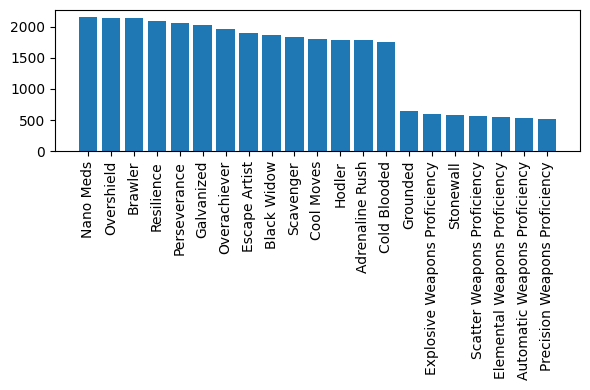

In [9]:
# plot histogram of talents frequency d = {talent: frequency} 
import matplotlib.pyplot as plt

# sort by frequency
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(d.keys(), d.values())
# label 90 degrees
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='rank', ylabel='nonce'>

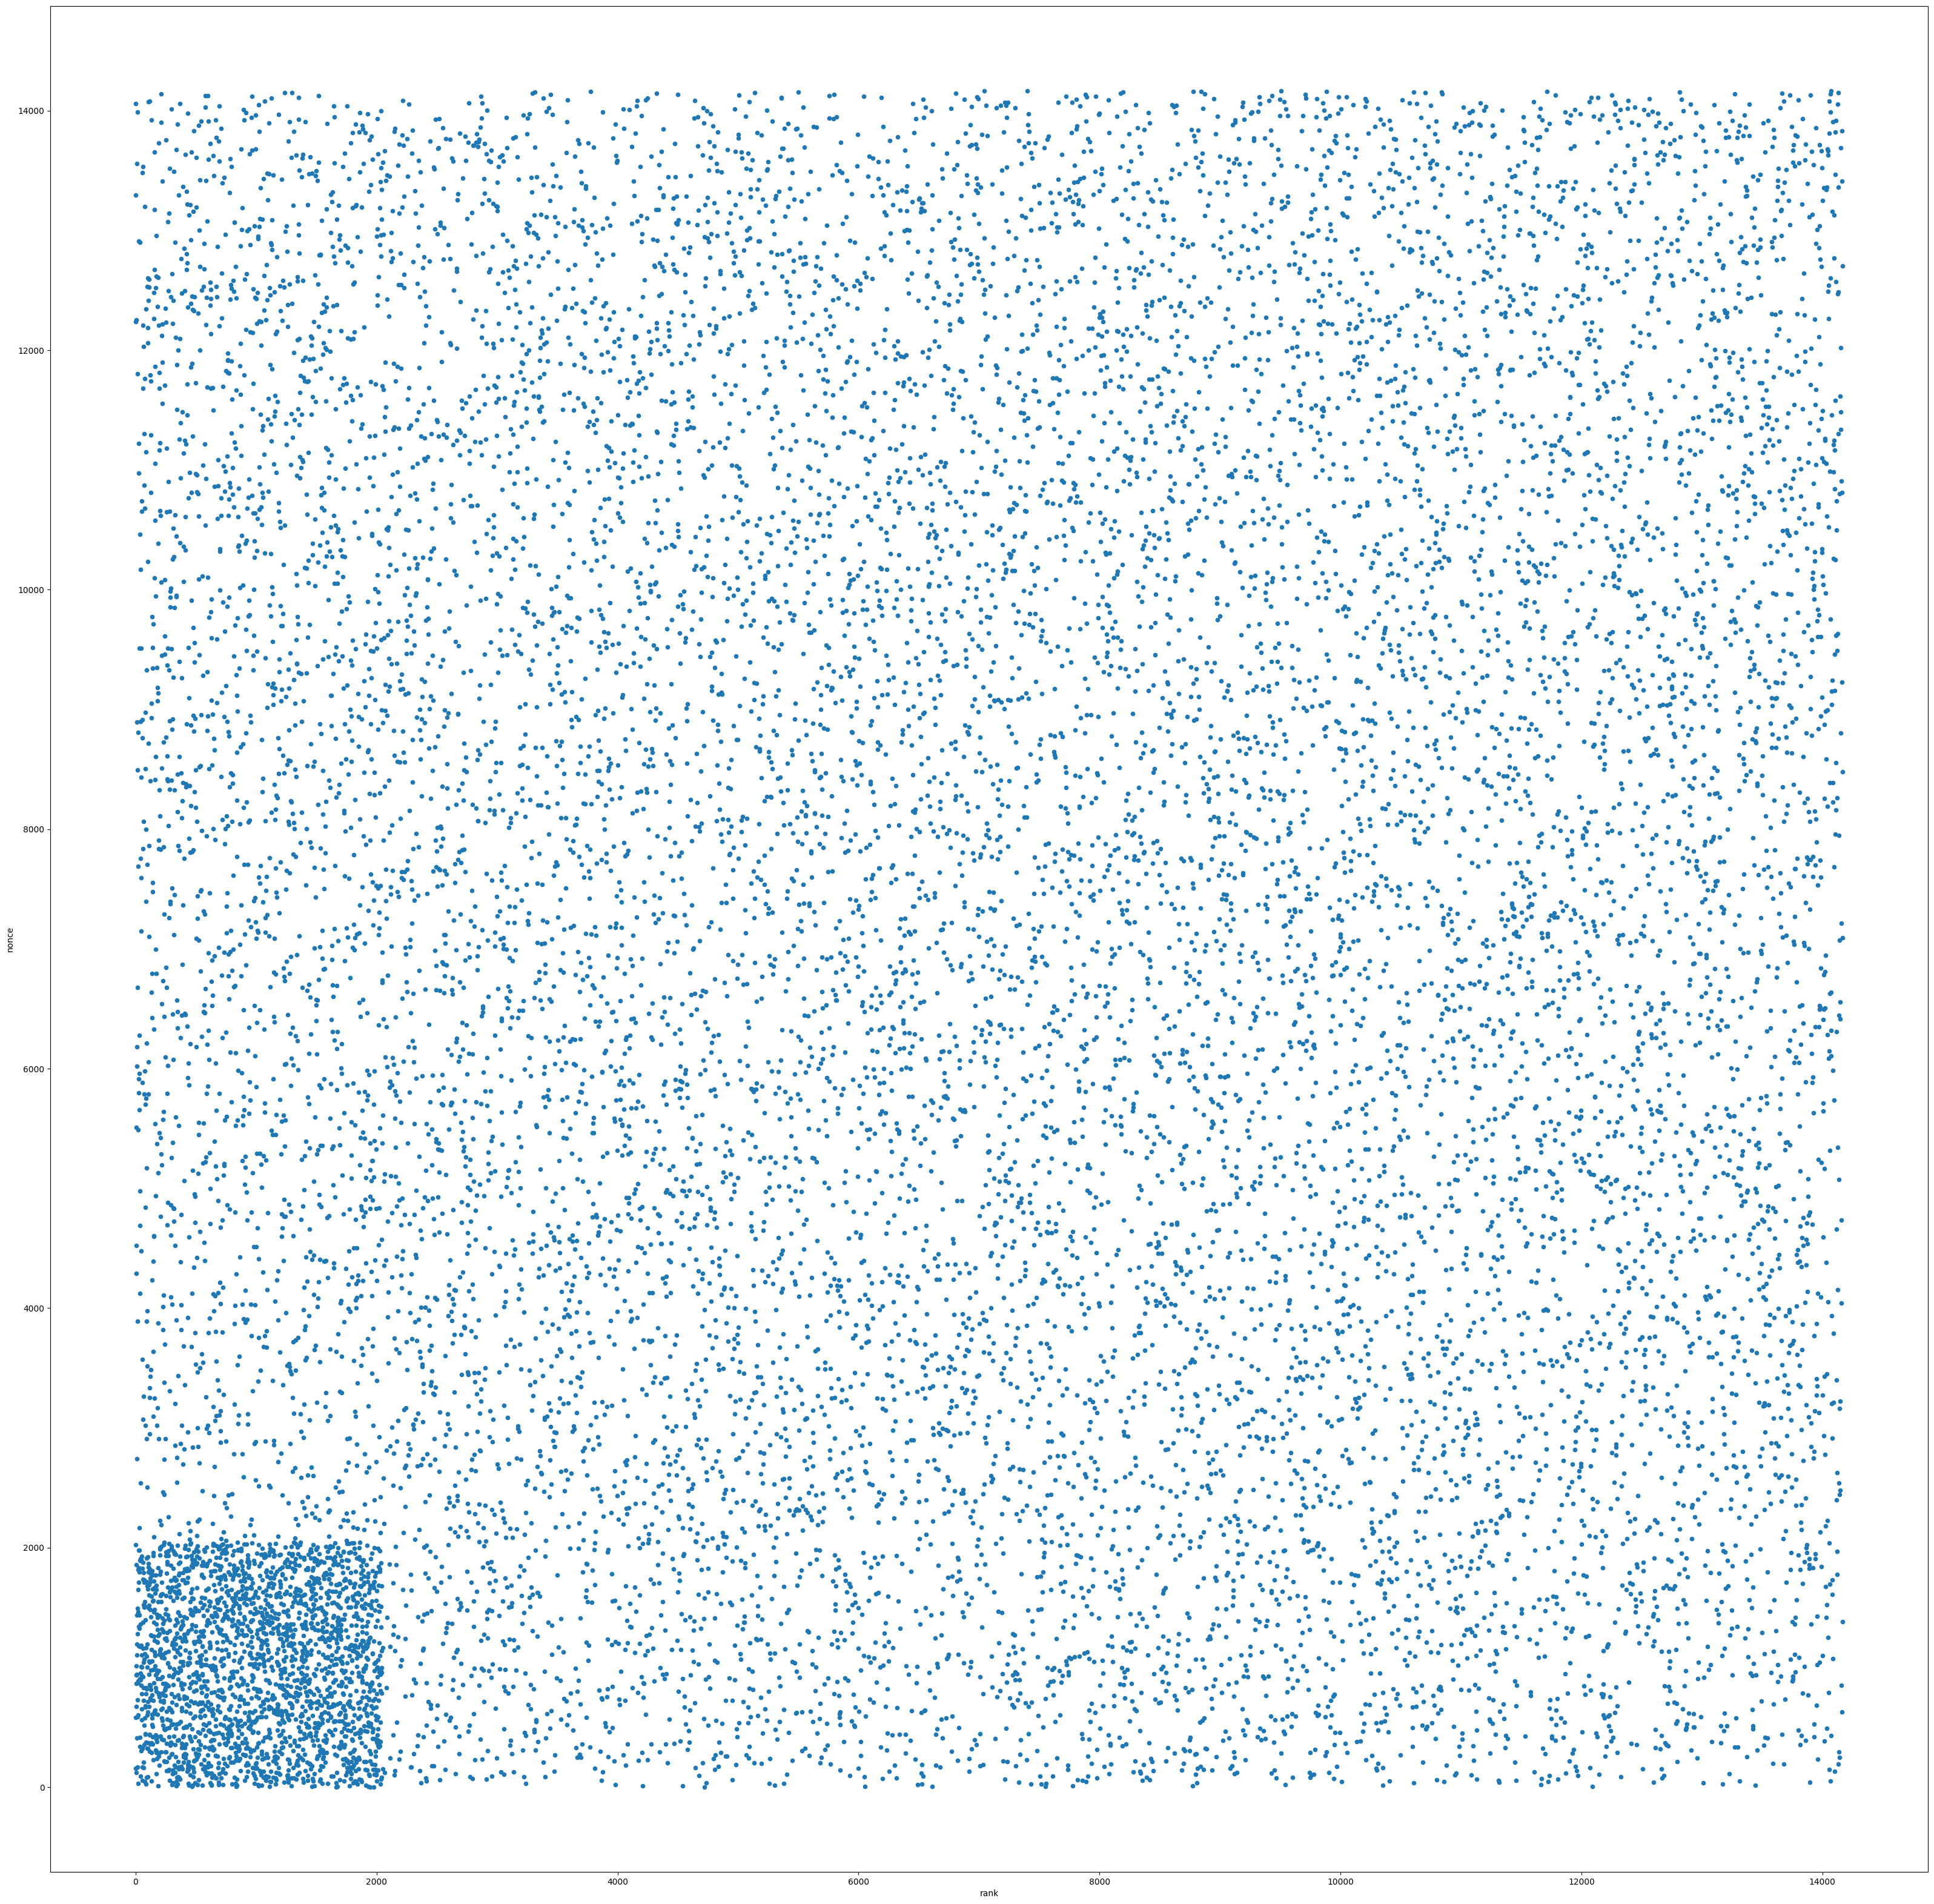

In [8]:
# scatter plot rank vs nonce figure size 40x40
df.plot.scatter(x='rank', y='nonce', figsize=(40, 40))